## Importante Pacotes e Carregando o Dataset

In [77]:
import pandas as pd
import matplotlib.pyplot as plt




pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [38]:
df_original = pd.read_csv("Dados/dados_coletados10k.csv")
df_original.head()

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Escolaridade,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
0,322068935715,43,M,5800.0,SP,23.0,200,2022-08-01,193,80000.0,92000.0,15,9,1,0,DIVORCIADO,Nenhum,N,0.0,0,NaN,91759.97,7717.08,Nao
1,322068936715,22,M,2000.0,MG,20.0,100,2022-08-01,89,50000.0,57500.0,10,10,0,0,SOLTEIRO(A),NaN,N,0.0,4,103.0,53981.18,6756.59,Nao
2,322068938715,35,M,4000.0,BA,18.0,100,2022-08-01,85,100000.0,115000.0,15,5,1,0,CASADO (A),NaN,N,0.0,0,NaN,101150.02,17929.06,Nao
3,322068939715,20,M,1800.0,MG,20.0,100,2022-08-01,89,30000.0,34500.0,1,1,0,0,SOLTEIRO(A),NaN,N,0.0,13,376.0,36208.10,369.10,Sim
4,322068940715,53,M,2800.0,MG,20.0,100,2022-08-01,87,60000.0,69000.0,16,16,0,0,CASADO (A),NaN,N,0.0,0,NaN,60984.00,11845.24,Nao


# Analise Exploratória - Visão Geral
<br>
Aqui o objetivo desta analise é ter uma visão geral do conjunto de dados, compreendendo seu tamanho, variaveis, 
tipo de dados e período dos dados coletados.

In [39]:
# Verificando a estrutura da base de dados
df_original.shape

(9517, 24)

In [40]:
# Informações sobre a base de dados
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Contrato                          9517 non-null   int64  
 1   Idade                             9517 non-null   int64  
 2   Sexo                              9517 non-null   object 
 3   Valor_Renda                       9517 non-null   float64
 4   UF_Cliente                        9517 non-null   object 
 5   Perc_Juros                        9517 non-null   float64
 6   Prazo_Emprestimo                  9517 non-null   int64  
 7   Data_Contratacao                  9517 non-null   object 
 8   Prazo_Restante                    9517 non-null   int64  
 9   VL_Emprestimo                     9517 non-null   float64
 10  VL_Emprestimo_ComJuros            9517 non-null   float64
 11  QT_Total_Parcelas_Pagas           9517 non-null   int64  
 12  QT_Tot

In [41]:
# Verificando valores nulos de cada coluna
df_original.isnull().sum()

Contrato                               0
Idade                                  0
Sexo                                   0
Valor_Renda                            0
UF_Cliente                             0
Perc_Juros                             0
Prazo_Emprestimo                       0
Data_Contratacao                       0
Prazo_Restante                         0
VL_Emprestimo                          0
VL_Emprestimo_ComJuros                 0
QT_Total_Parcelas_Pagas                0
QT_Total_Parcelas_Pagas_EmDia          0
QT_Total_Parcelas_Pagas_EmAtraso       0
Qt_Renegociacao                        0
Estado_Civil                           0
Escolaridade                        7105
Possui_Patrimonio                      0
VL_Patrimonio                          0
QT_Parcelas_Atraso                     0
QT_Dias_Atraso                      3594
Saldo_Devedor                          0
Total_Pago                             0
Possivel_Fraude                        0
dtype: int64

- Possuimos valores nulos nas coluna **Escolaridade** e **QT_Dias_Atraso**

In [42]:
# Estatísticas da base de dados
df_original.describe()

,Contrato,Idade,Valor_Renda,Perc_Juros,Prazo_Emprestimo,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago
count,9.517000e+03,9517.000000,9.517000e+03,9517.000000,9517.000000,9517.000000,9517.000000,9517.000000,9517.000000,9517.000000,9517.000000,9517.000000,9517.000000,9517.000000,5923.000000,9517.000000,9517.000000
mean,3.220782e+11,38.738678,8.325404e+03,19.645729,107.425344,104.583482,81881.885048,94164.167805,7.893139,4.108122,1.597247,1.242093,10.927813,5.353788,249.789802,90560.267866,8166.206714
std,5.434161e+06,12.674802,1.218621e+05,3.820652,62.488802,68.568209,94138.059627,108258.768571,5.165751,4.040356,2.313021,1.165580,1025.262221,5.320100,123.221927,111050.541232,16697.758870
min,3.220689e+11,6.000000,4.500000e+02,7.000000,15.000000,0.000000,3500.000000,4025.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000
25%,3.220733e+11,29.000000,2.300000e+03,18.000000,60.000000,51.000000,20000.000000,23000.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,162.000000,18546.850000,1202.040000
50%,3.220785e+11,37.000000,3.400000e+03,20.000000,80.000000,80.000000,50000.000000,57500.000000,9.000000,2.000000,1.000000,1.000000,0.000000,4.000000,284.000000,45375.300000,3949.910000
75%,3.220826e+11,46.000000,5.000000e+03,22.000000,190.000000,185.000000,100000.000000,115000.000000,13.000000,6.000000,2.000000,2.000000,0.000000,11.000000,344.000000,119721.250000,8302.010000
max,3.220876e+11,91.000000,8.000080e+06,28.000000,240.000000,227.000000,500000.000000,575000.000000,35.000000,35.000000,14.000000,9.000000,100000.000000,15.000000,435.000000,625000.000000,396385.000000


In [43]:
# valores unicos de cada coluna

for coluna in df_original.columns:
    print(f"{coluna} : {len(df_original[coluna].unique())}")

Contrato : 9517
Idade : 74
Sexo : 2
Valor_Renda : 855
UF_Cliente : 27
Perc_Juros : 21
Prazo_Emprestimo : 36
Data_Contratacao : 110
Prazo_Restante : 79
VL_Emprestimo : 61
VL_Emprestimo_ComJuros : 61
QT_Total_Parcelas_Pagas : 24
QT_Total_Parcelas_Pagas_EmDia : 24
QT_Total_Parcelas_Pagas_EmAtraso : 15
Qt_Renegociacao : 10
Estado_Civil : 6
Escolaridade : 6
Possui_Patrimonio : 2
VL_Patrimonio : 3
QT_Parcelas_Atraso : 16
QT_Dias_Atraso : 16
Saldo_Devedor : 7654
Total_Pago : 7022
Possivel_Fraude : 2


In [44]:
# Avaliando o maior e menor valor da variavel Valor_Renda
print('Maior Renda:', df_original['Valor_Renda'].max())
print('Menor Renda:', df_original['Valor_Renda'].min())

Maior Renda: 8000080.0
Menor Renda: 450.0


In [45]:
# Avaliando o maior e menor valor da variavel QT_Dias_Atraso
print('Maior quantidade de dias atraso: ', df_original['QT_Dias_Atraso'].max())
print('Menor quantidade de dias atraso: ', df_original['QT_Dias_Atraso'].min())

Maior quantidade de dias atraso:  435.0
Menor quantidade de dias atraso:  11.0


In [46]:
# Avaliando o maior e menor valor da variavel Prazo_Restante
print('Maior quantidade de dias restante: ', df_original['Prazo_Restante'].max())
print('Menor quantidade de dias restante: ', df_original['Prazo_Restante'].min())

Maior quantidade de dias restante:  227
Menor quantidade de dias restante:  0


In [47]:
# Quantidade de dias em atraso
df_original['QT_Dias_Atraso'].value_counts(ascending=False)

344.0    930
315.0    718
376.0    686
284.0    546
11.0     532
251.0    471
406.0    413
225.0    352
41.0     255
194.0    241
162.0    206
103.0    205
71.0     190
133.0    176
435.0      2
Name: QT_Dias_Atraso, dtype: int64

In [48]:
# Prazo emprestimo
df_original['Prazo_Emprestimo'].value_counts(ascending=False)

200    1661
80     1421
100     928
60      890
190     674
75      455
90      354
48      333
36      306
30      272
45      205
55      185
50      184
25      183
140     167
20      146
40      136
95      135
70      134
180     129
240     110
120     102
35       81
170      78
235      71
150      48
65       36
160      33
130      21
42       20
19        5
18        4
15        4
165       3
88        2
34        1
Name: Prazo_Emprestimo, dtype: int64

In [49]:
# Prazo restante
df_original['Prazo_Restante'].value_counts(ascending=False)

193    764
91     705
225    534
227    519
64     421
89     420
198    337
185    332
68     330
74     304
71     270
51     256
36     204
143    197
75     193
80     188
60     178
35     168
23     164
82     159
53     150
49     145
19     143
87     129
44     126
175    119
76      99
13      94
79      86
17      85
25      84
40      73
85      72
29      71
31      71
125     68
34      67
77      67
78      63
159     58
38      55
28      52
30      51
84      48
129     44
66      43
107     43
16      42
33      40
156     39
27      38
41      37
11      32
37      31
8       31
7       29
18      27
179     27
43      27
133     25
120     24
20      23
39      22
6       22
50      19
45      19
221     17
149     16
100     15
42      14
10      12
15      10
9        8
59       7
12       6
3        3
46       2
0        2
4        2
Name: Prazo_Restante, dtype: int64

In [50]:
# Quantidado por sexo
df_original["Sexo"].value_counts(ascending=False)

M    5706
F    3811
Name: Sexo, dtype: int64

In [51]:
# Quantidade por idade
df_original["Idade"].value_counts(ascending=False)

35    336
34    310
29    298
26    296
32    288
44    285
30    284
31    281
28    280
36    280
27    277
33    273
38    271
39    270
41    270
40    264
37    262
25    253
24    251
42    243
23    234
43    233
45    229
46    208
20    207
21    193
47    177
22    173
49    172
48    167
50    148
51    143
55    124
54    124
53    122
52    118
19    109
60     99
56     96
58     90
59     79
57     76
61     71
66     65
62     56
64     54
63     49
68     48
67     39
65     37
69     33
70     27
72     19
71     16
74     16
73     16
76     12
80      9
75      7
18      6
81      5
78      5
85      5
77      5
83      4
17      4
82      3
79      3
84      2
87      2
90      2
88      2
6       1
91      1
Name: Idade, dtype: int64

In [52]:
# Estado civil
df_original["Estado_Civil"].value_counts(ascending=False)

SOLTEIRO(A)      5087
CASADO (A)       3027
OUTRO             652
DIVORCIADO        481
VIÚVO(A)          140
UNIÃO ESTAVEL     130
Name: Estado_Civil, dtype: int64

- Observamos que na coluna **Estado_Civil** temos valores **CASADO** e **UNIÃO ESTAVEL** que podem ser a mesma coisa para introduzir nos modelos.

In [53]:
# Escolaridade
df_original["Escolaridade"].value_counts(ascending=False)

Nenhum                                  2184
Ensino Médio                             129
Ensino Superior                           74
Ensino Fundamental                        18
Pós Graduação / Mestrado / Doutorado       7
Name: Escolaridade, dtype: int64

In [54]:
# Clientes possui patrimonio
df_original["Possui_Patrimonio"].value_counts(ascending=False)

N    9452
S      65
Name: Possui_Patrimonio, dtype: int64

In [55]:
# Patrimonio dos clientes
df_original["VL_Patrimonio"].value_counts(ascending=False)

0.0         9512
1000.0         4
100000.0       1
Name: VL_Patrimonio, dtype: int64

In [56]:
# Variavel Target
df_original["Possivel_Fraude"].value_counts(ascending=False)

Nao    5035
Sim    4482
Name: Possivel_Fraude, dtype: int64

### Tratando os dados que identificamos que precisam ser ajustados em nossa análise acima

In [57]:
# Ajustando ESTADO_CIVIL
df_original["Estado_Civil"] = df_original["Estado_Civil"].replace("UNIÃO ESTAVEL", "CASADO (A)")
df_original["Estado_Civil"].value_counts()

SOLTEIRO(A)    5087
CASADO (A)     3157
OUTRO           652
DIVORCIADO      481
VIÚVO(A)        140
Name: Estado_Civil, dtype: int64

In [60]:
# Criando faixa estaria para utilizarmos no modelo preditivo
bins = [0, 21, 30, 40, 50, 60 ,100]
labels = ["Até 21 anos", "De 22 até 30 Anos", "De 31 até 40 Anos", "De 41 até 50 Anos", "De 51 até 60", "Acima de 60 Anos"]

df_original["Faixa_Etaria"] = pd.cut(df_original["Idade"], bins=bins, labels=labels)
df_original["Faixa_Etaria"].value_counts()

De 31 até 40 Anos    2835
De 22 até 30 Anos    2346
De 41 até 50 Anos    2132
De 51 até 60         1071
Acima de 60 Anos      613
Até 21 anos           520
Name: Faixa_Etaria, dtype: int64

In [61]:
# Criando faixa salaria para utilizarmos no modelo prditivo
bins = [-100, 1000, 2000, 3000, 5000, 10000, 20000, 30000, 9000000000]
labels = ['Até 1k', 'De 1k até 2k', 'De 2k até 3k', 'De 3k até 5k', 'De 5k até 10k', 'De 10k até 20k',
          'De 20k até 30k', 'Acima de 50k']

df_original["Faixa_Salarial"] = pd.cut(df_original["Valor_Renda"], bins=bins, labels=labels)
df_original["Faixa_Salarial"].value_counts()

De 3k até 5k      2646
De 2k até 3k      2522
De 1k até 2k      2012
De 5k até 10k     1574
De 10k até 20k     488
De 20k até 30k     137
Acima de 50k       119
Até 1k              19
Name: Faixa_Salarial, dtype: int64

In [62]:
df_original.head()

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Escolaridade,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude,Faixa_Etaria,Faixa_Salarial
0,322068935715,43,M,5800.0,SP,23.0,200,2022-08-01,193,80000.0,92000.0,15,9,1,0,DIVORCIADO,Nenhum,N,0.0,0,NaN,91759.97,7717.08,Nao,De 41 até 50 Anos,De 5k até 10k
1,322068936715,22,M,2000.0,MG,20.0,100,2022-08-01,89,50000.0,57500.0,10,10,0,0,SOLTEIRO(A),NaN,N,0.0,4,103.0,53981.18,6756.59,Nao,De 22 até 30 Anos,De 1k até 2k
2,322068938715,35,M,4000.0,BA,18.0,100,2022-08-01,85,100000.0,115000.0,15,5,1,0,CASADO (A),NaN,N,0.0,0,NaN,101150.02,17929.06,Nao,De 31 até 40 Anos,De 3k até 5k
3,322068939715,20,M,1800.0,MG,20.0,100,2022-08-01,89,30000.0,34500.0,1,1,0,0,SOLTEIRO(A),NaN,N,0.0,13,376.0,36208.10,369.10,Sim,Até 21 anos,De 1k até 2k
4,322068940715,53,M,2800.0,MG,20.0,100,2022-08-01,87,60000.0,69000.0,16,16,0,0,CASADO (A),NaN,N,0.0,0,NaN,60984.00,11845.24,Nao,De 51 até 60,De 2k até 3k


In [67]:
# Trando os valores nulos da coluna QT_Dias_Atraso
# Vamos subistituir o valores nulos pela mediana dos dados

mediana_QT_Dias_Atraso = df_original["QT_Dias_Atraso"].median()

df_original["QT_Dias_Atraso"] = df_original["QT_Dias_Atraso"].fillna(mediana_QT_Dias_Atraso)

In [68]:
# Verificando novamente os valores nulos da coluna
df_original["QT_Dias_Atraso"].isnull().sum()

0

In [71]:
# Vamos agora criar uma faixa de dais de atraso das contas

bins = [-100, 30, 60, 90, 180, 240, 360, 500]
labels = ['Até 30 dias', 'De 31 até 60', 'De 61 até 90', 'De 91 até 180', 'De 181 até 240','De 241 até 360', 'Acima de 360']

df_original["Faixa_Dias_Atraso"] = pd.cut(df_original["QT_Dias_Atraso"], bins=bins, labels=labels)
df_original["Faixa_Dias_Atraso"].value_counts()

De 241 até 360    6259
Acima de 360      1101
De 181 até 240     593
De 91 até 180      587
Até 30 dias        532
De 31 até 60       255
De 61 até 90       190
Name: Faixa_Dias_Atraso, dtype: int64

In [73]:
# Criando faixa de prazo de emprestimo para utilizarmos no modelo preditivo
bins = [0, 60, 120, 200, 720]
labels = ['Até 60 Meses', 'De 61 até 120 Meses', 'De 121 até 200 Meses', 'Acima de 200 Meses']
df_original['Faixa_Prazo_Emprestimo'] = pd.cut(df_original['Prazo_Emprestimo'], bins=bins, labels=labels)
df_original["Faixa_Prazo_Emprestimo"].value_counts()

De 61 até 120 Meses     3567
Até 60 Meses            2955
De 121 até 200 Meses    2814
Acima de 200 Meses       181
Name: Faixa_Prazo_Emprestimo, dtype: int64

In [74]:
# Criando faixa de prazo restante do emprestimo para utilizarmos no modelo preditivo
bins = [-1, 60, 120, 200, 500]
labels = ['Até 60 Meses', 'De 61 até 120 Meses', 'De 121 até 200 Meses', 'Acima de 200 Meses']
df_original['Faixa_Prazo_Restante'] = pd.cut(df_original['Prazo_Restante'], bins=bins, labels=labels)
df_original["Faixa_Prazo_Restante"].value_counts()

De 61 até 120 Meses     3679
Até 60 Meses            2742
De 121 até 200 Meses    2026
Acima de 200 Meses      1070
Name: Faixa_Prazo_Restante, dtype: int64

---

### Após  os ajustes vamos vizualizar em formas graficas para melhor avaliação

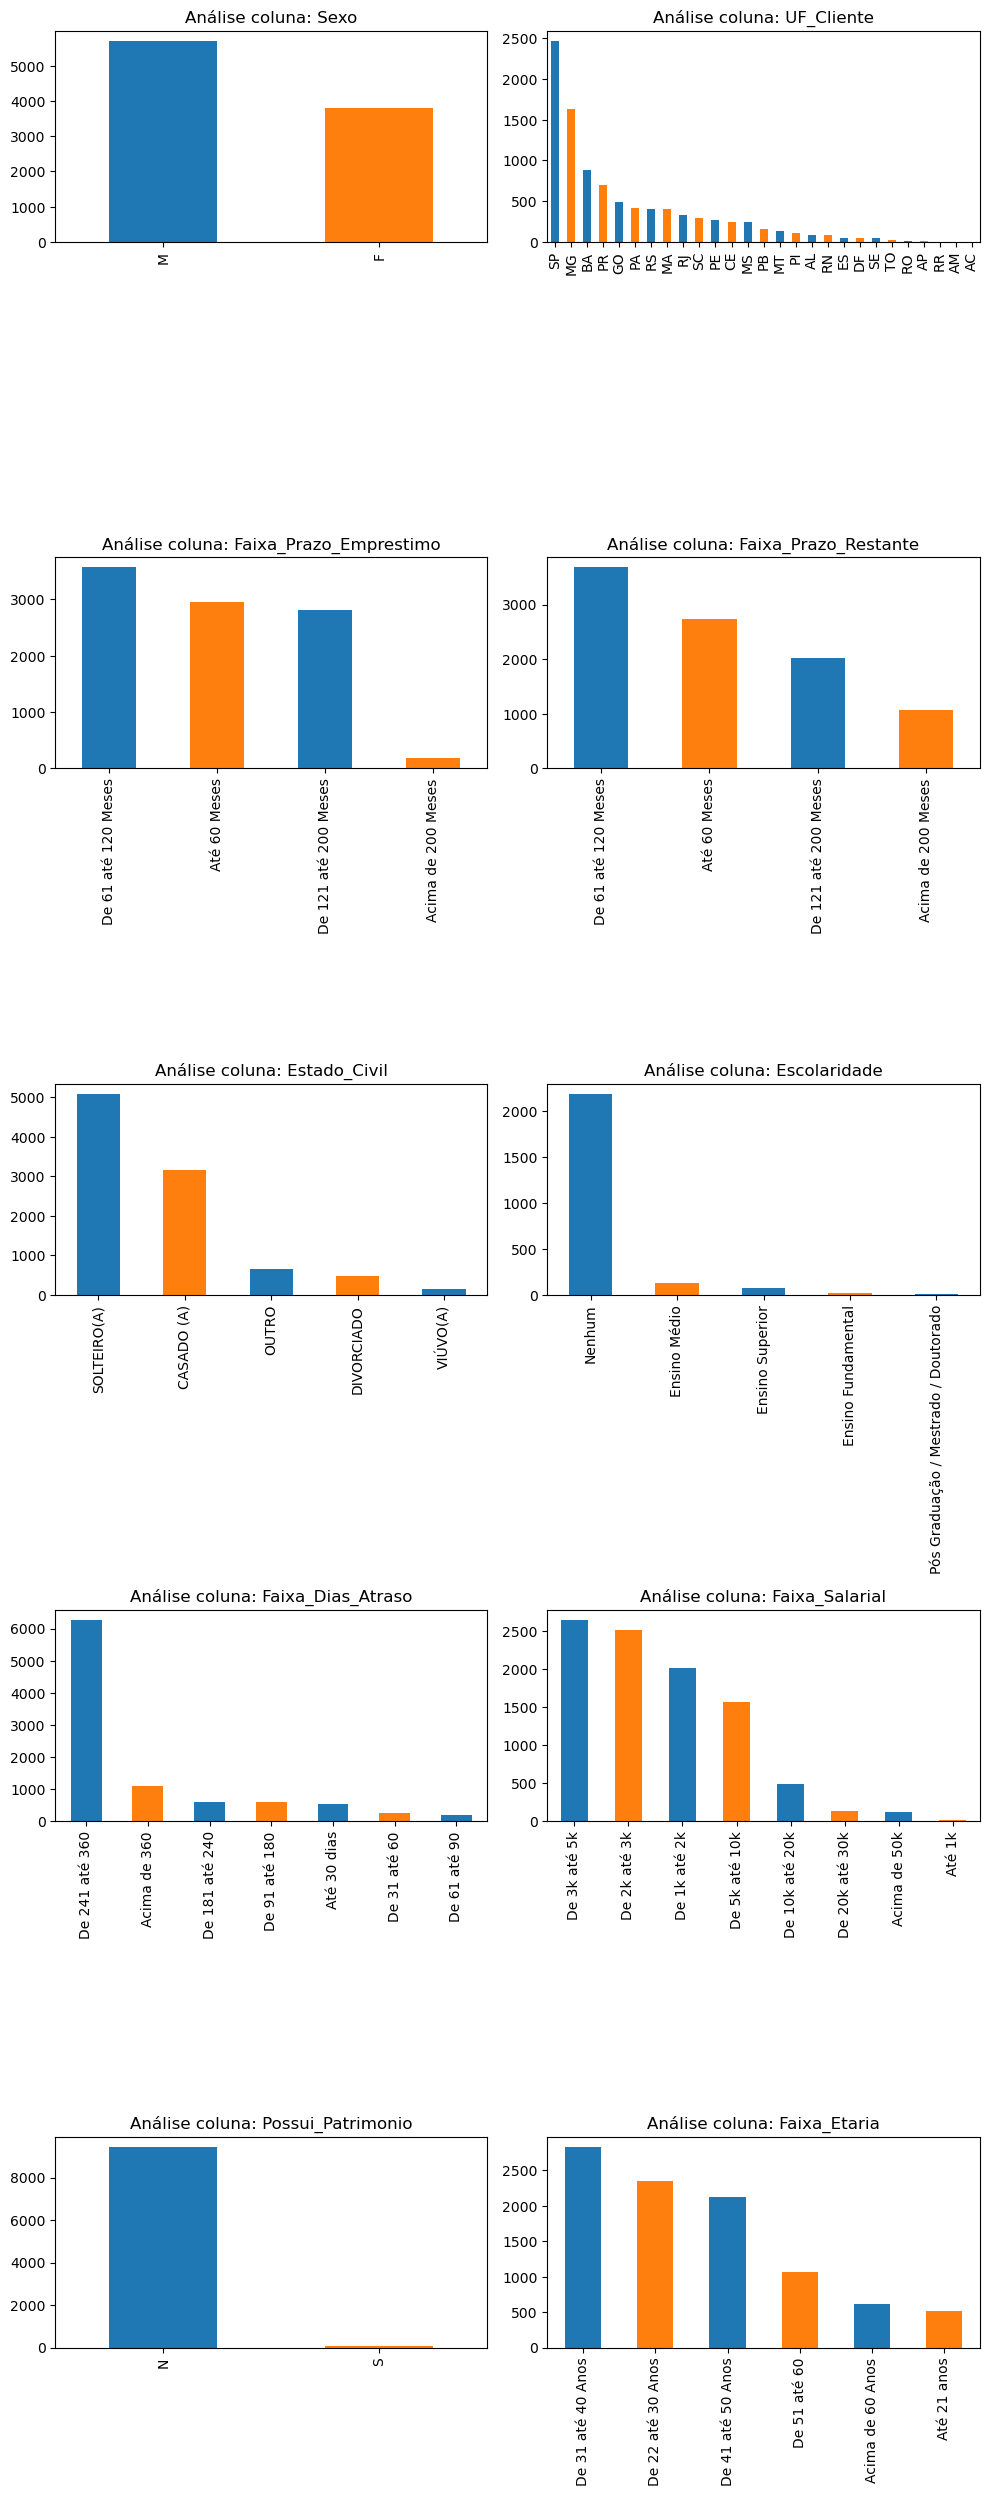

In [99]:
# Gerando Grafico para as colunas
colunas_graficos = ["Sexo", "UF_Cliente", "Faixa_Prazo_Emprestimo", "Faixa_Prazo_Restante", "Estado_Civil", "Escolaridade", "Faixa_Dias_Atraso", "Faixa_Salarial", "Possui_Patrimonio", "Faixa_Etaria"]


num_linhas = 10
num_colunas = 2


plt.figure(figsize=(10, 50))


for i, coluna in enumerate(colunas_graficos, 1):
    plt.subplot(num_linhas, num_colunas, i)
    df_original[coluna].value_counts().plot(kind="bar", title=f"Análise coluna: {coluna}", color=['#1F77B4', '#FF7F0E'])

plt.tight_layout()
plt.show()


<AxesSubplot: title={'center': 'Possiveis Fraudes'}>

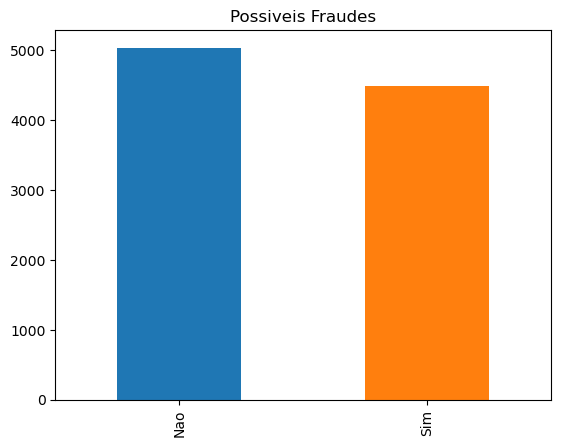

In [100]:
# Verififanco a variavel Possiveis Fraudes que é a Target
# Aqui podemos observar que há mais cotas como NÃO POSSÍVEL FRAUDE
# dessa forma, precisaremos balancear o dataset mais adiante.

df_original["Possivel_Fraude"].value_counts().plot(kind="bar", title="Possiveis Fraudes", color=['#1F77B4', '#FF7F0E'])